**Californina House Price Prediction**

In this project, we are going to prediction the price of house which consist of 13 feature of house. 

**Datasets Descprition** \
The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional r requirements for it.

**Problem Objective** \
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

**Domain** \
 Finance and Housing

**Analysis Tasks**

1.Build a model of housing prices to predict median house values in  California using the provided dataset.\
2.Train the model to learn from the data to predict the median housing price in any district, given all the other metrics. \
3.Predict housing prices based on median_income and plot the regression chart for it. \


**Load the data** \
• Read the “housing.csv” file from the folder into the program. \
• Print first few rows of this data. \
• Extract input (X) and output (Y) data from the dataset.  \

**Handle missing values** \
• Fill the missing values with the mean of the respective column.

**Encode categorical data** \
• Convert categorical column in the dataset to numerical data.

**Split the dataset**  \
• Split the data into 80% training dataset and 20% test dataset.

**Standardize data** \
• Standardize training and test datasets.

**Perform Linear Regression** \
• Perform Linear Regression on training data. \
• Predict output for test dataset using the fitted model. \
• Print root mean squared error (RMSE) from Linear Regression. 


**Bonus exercise**\
 Perform Linear Regression with one independent variable :\
• Extract just the medianincome column from the independent variables (from Xtrain and Xtest). \
• Perform Linear Regression to predict housing values based on medianincome.\
• Predict output for test dataset using the fitted model.\
• Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

**Dataset Size: 20640 rows x 10 columns**

In [43]:
#Loading the Libraies

import numpy as np  # NumPy is a library for the Python programming language, 
                    # adding support for large, multi-dimensional arrays and 
                    # matrices, along with a large collection of high-level 
                    # mathematical functions to operate on these arrays

import pandas as pd # pandas is a software library written for the Python 
                    # programming language for data manipulation and analysis

import sklearn   # Scikit-learn (Sklearn) is the most useful and robust library 
                 # for machine learning in Python. It provides a selection of 
                 # efficient tools for machine learning and statistical modeling
                 # including classification, regression, clustering and
                 # dimensionality reduction via a consistence interface in Python.
import seaborn as sns

import matplotlib.pyplot as plt

In [41]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Loading the Datasets

housing_pd = pd.read_csv('1553768847-housing.csv') # read csv allow us to load the data as DataFrame
housing_pd.head(5) # head() it is use to displace frist 5 row of data. By deault the number of row to displace is set to 5.

# X value are 
#longitude (signed numeric - float) : Longitude value for the block in California, USA
#latitude (numeric - float ) : Latitude value for the block in California, USA
#housing_median_age (numeric - int ) : Median age of the house in the block
#total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block totalbedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block
#population (numeric - int ) : Count of the total number of population in the block
#households (numeric - int ) : Count of the total number of households in the block
#median_income (numeric - float ) : Median of the total household income of all the houses in the block oceanproximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]





# Y value are
#median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
# Now let check the dataset
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
# Statistics on data 
housing_pd.describe() # This command will give us all the Statistics of non-categorical data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
# Now let shuffled to dataset 
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1) # random_state allow use to get same shuffled 
                                                                           # even if we the run command in different pc or platform
housing_pd_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4712,-118.36,34.06,39,2810,670.0,1109,624,3.2500,<1H OCEAN,355000
2151,-119.78,36.78,37,2185,455.0,1143,438,1.9784,INLAND,70700
15927,-122.42,37.73,46,1819,411.0,1534,406,4.0132,NEAR BAY,229400
82,-122.28,37.81,52,340,97.0,200,87,1.5208,NEAR BAY,112500
8161,-118.13,33.82,37,1530,290.0,711,283,5.1795,<1H OCEAN,225400


In [12]:
# In the given datasets there is only one Caterogical Varaibles
# Ocean Proximity 
housing_pd_shuffled['ocean_proximity'].value_counts() # value counts is used to determine number of unique values 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head() #Convert categorical variable into dummy/indicator variables.

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [15]:
# Dropping the ocean proximity columns 
housing_pd_shuffled.drop('ocean_proximity',axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39,2810,670.0,1109,624,3.2500,355000
2151,-119.78,36.78,37,2185,455.0,1143,438,1.9784,70700
15927,-122.42,37.73,46,1819,411.0,1534,406,4.0132,229400
82,-122.28,37.81,52,340,97.0,200,87,1.5208,112500
8161,-118.13,33.82,37,1530,290.0,711,283,5.1795,225400


In [16]:
# Replacing the ocean proximity columns with the dummies columns which can help to get the price of House
housing_pd_concat = pd.concat([housing_pd_shuffled.drop('ocean_proximity',axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])],axis=1)
housing_pd_concat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39,2810,670.0,1109,624,3.2500,355000,1,0,0,0,0
2151,-119.78,36.78,37,2185,455.0,1143,438,1.9784,70700,0,1,0,0,0
15927,-122.42,37.73,46,1819,411.0,1534,406,4.0132,229400,0,0,0,1,0
82,-122.28,37.81,52,340,97.0,200,87,1.5208,112500,0,0,0,1,0
8161,-118.13,33.82,37,1530,290.0,711,283,5.1795,225400,1,0,0,0,0


In [17]:
# Changing the arrangment of columns, in this the last columns can be the median house value which is the y value(which we need to predict)
housing_pd_final = housing_pd_concat[['longitude','latitude','housing_median_age',
                                      'total_rooms','total_bedrooms','population',
                                      'households','median_income',
                                      '<1H OCEAN','INLAND','ISLAND','NEAR BAY','NEAR OCEAN','median_house_value']]
housing_pd_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39,2810,670.0,1109,624,3.2500,1,0,0,0,0,355000
2151,-119.78,36.78,37,2185,455.0,1143,438,1.9784,0,1,0,0,0,70700
15927,-122.42,37.73,46,1819,411.0,1534,406,4.0132,0,0,0,1,0,229400
82,-122.28,37.81,52,340,97.0,200,87,1.5208,0,0,0,1,0,112500
8161,-118.13,33.82,37,1530,290.0,711,283,5.1795,1,0,0,0,0,225400


In [19]:
# Since the number of unknown data are nearly 207 compare to knowns data this value is less so lets drop the unknowns value.
housing_pd_final=housing_pd_final.dropna()
len(housing_pd_final)

20433

In [137]:
# Split the Datasets in x and y
x=housing_pd_final.drop('median_house_value',axis=1)
y=housing_pd_final['median_house_value']

# split the Dataset in training and test set into 80:20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18720,-122.37,40.60,7,5178,1336.0,2557,1283,2.4079,0,1,0,0,0
8670,-118.37,33.82,32,2815,607.0,1338,609,4.5687,1,0,0,0,0
4295,-118.29,34.09,29,2240,792.0,2254,739,2.3317,1,0,0,0,0
2704,-115.57,32.83,31,1494,289.0,959,284,3.5282,0,1,0,0,0
13469,-117.36,34.09,32,3616,631.0,2131,593,3.2879,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,-119.06,34.35,34,2426,646.0,2116,631,2.0682,1,0,0,0,0
3338,-122.55,38.81,7,3639,637.0,1027,421,3.8831,0,1,0,0,0
7787,-118.06,33.90,37,1161,254.0,882,236,4.4167,1,0,0,0,0
10981,-117.84,33.76,26,2110,409.0,1146,407,4.3698,1,0,0,0,0


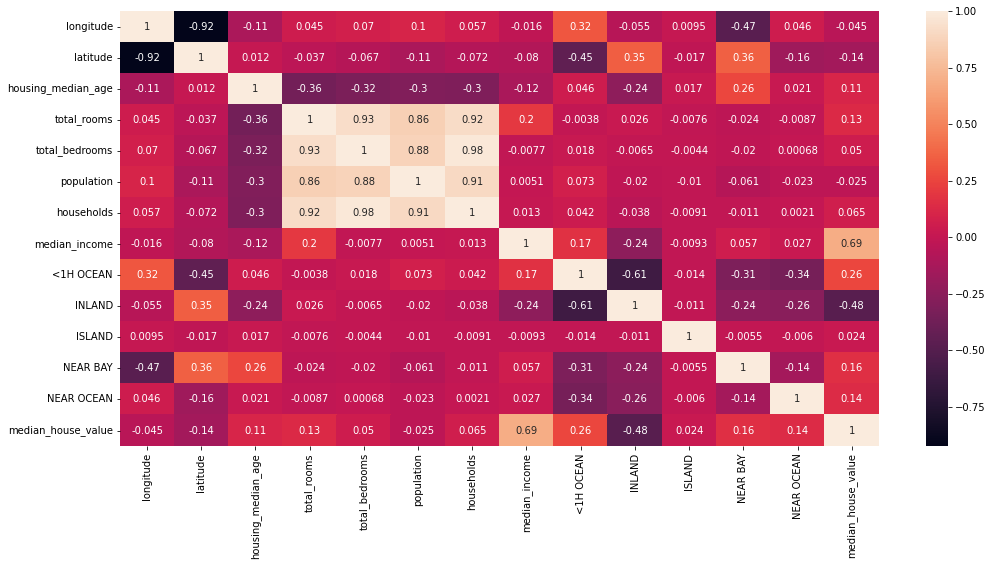

In [138]:
# Use the heatmap function from the seaborn package
plt.figure(figsize = (17,8))
sns.heatmap(housing_pd_final.corr(), annot = True)

In [139]:
# Standardize data 
# it is need 
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler().fit(X_train.values) # fit the value as normal distruibution

def preprocessor(X):
    A = np.copy(X)
    A[:,:13] = scaler.transform(A[:,:13])
    return A

x_train_preprocessed = preprocessor(X_train.values)
x_test_preprocessed = preprocessor(X_test.values)




In [66]:
pd.DataFrame(x_train_preprocessed)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.397258,2.327431,-1.707955,1.151666,1.872954,0.981490,2.031066,-0.770342,-0.890347,1.468818,-0.017492,-0.352214,-0.387289
1,0.595924,-0.844808,0.271837,0.079711,0.160041,-0.076667,0.282616,0.370053,1.123158,-0.680819,-0.017492,-0.352214,-0.387289
2,0.635788,-0.718480,0.034262,-0.181132,0.594731,0.718469,0.619854,-0.810558,1.123158,-0.680819,-0.017492,-0.352214,-0.387289
3,1.991151,-1.308011,0.192645,-0.519549,-0.587156,-0.405659,-0.560479,-0.179087,-0.890347,1.468818,-0.017492,-0.352214,-0.387289
4,1.099203,-0.718480,0.271837,0.443078,0.216433,0.611699,0.241110,-0.305909,-0.890347,1.468818,-0.017492,-0.352214,-0.387289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,0.252100,-0.596831,0.430220,-0.096755,0.251678,0.598678,0.339687,-0.949624,1.123158,-0.680819,-0.017492,-0.352214,-0.387289
16342,-1.486951,1.489922,-1.707955,0.453512,0.230531,-0.346632,-0.205082,0.008217,-0.890347,1.468818,-0.017492,-0.352214,-0.387289
16343,0.750396,-0.807378,0.667795,-0.670611,-0.669394,-0.472499,-0.684998,0.289833,1.123158,-0.680819,-0.017492,-0.352214,-0.387289
16344,0.860021,-0.872881,-0.203313,-0.240106,-0.305195,-0.243333,-0.241400,0.265081,1.123158,-0.680819,-0.017492,-0.352214,-0.387289


In [143]:
# Mean Square Error with linear Regression
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm= LinearRegression().fit(x_train_preprocessed,y_train)
R2_score_train=r2_score(lm.predict(x_train_preprocessed),y_train)
R2_score_test=r2_score(lm.predict(x_test_preprocessed),y_test)
print("R2 score(train) = " +str(R2_score_train) +"   R2_score_test = "+ str(R2_score_test) )


R2 score(train) = 0.44020443453026326   R2_score_test = 0.4733523832747556


137.50880984599996


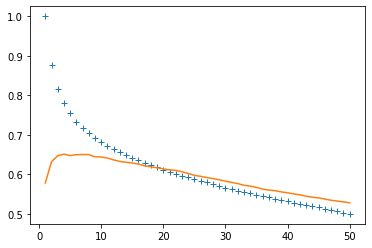

In [81]:
#KNN Regressore
R2_score_train=[]
R2_score_test=[]
import time
start = time.process_time()
n=np.linspace(1,50,dtype=int)
for i in n:
  from sklearn.neighbors import KNeighborsRegressor as KNN
  knn = KNN(n_neighbors=i).fit(x_train_preprocessed,y_train)
  R2_score_train.append(r2_score(knn.predict(x_train_preprocessed),y_train))
  R2_score_test.append(r2_score(knn.predict(x_test_preprocessed),y_test))

print(time.process_time() - start)

plt.plot(n,R2_score_train,'+')
plt.plot(n,R2_score_test,'-')
plt.xlim(0,50)
plt.ylim(0,1)

8.483032904999959


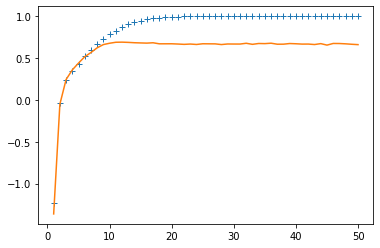

In [86]:
# Decision Tree Regressor
R2_score_train=[]
R2_score_test=[]
import time
start = time.process_time()
n=np.linspace(1,50,dtype=int)
for i in n:
  from sklearn.tree import DecisionTreeRegressor as DTR

  dtr = DTR(max_depth=i).fit(x_train_preprocessed,y_train)

  R2_score_train.append(r2_score(dtr.predict(x_train_preprocessed),y_train))
  R2_score_test.append(r2_score(dtr.predict(x_test_preprocessed),y_test))
print(time.process_time() - start)

plt.plot(n,R2_score_train,'+')
plt.plot(n,R2_score_test,'-')
plt.xlim(0,50)
plt.ylim(0,1)

908.1506136810001


(0.0, 1.0)

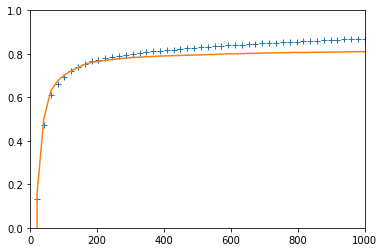

In [91]:
# Gradient Boosting Regressor
R2_score_train=[]
R2_score_test=[]
import time
start = time.process_time()
n=np.linspace(1,1000,50,dtype=int)
for i in n:
  from sklearn.ensemble import GradientBoostingRegressor as GBR

  gbr = GBR(n_estimators=i).fit(x_train_preprocessed,y_train)

  R2_score_train.append(r2_score(gbr.predict(x_train_preprocessed),y_train))
  R2_score_test.append(r2_score(gbr.predict(x_test_preprocessed),y_test))
print(time.process_time() - start)

plt.plot(n,R2_score_train,'+')
plt.plot(n,R2_score_test,'-')
plt.xlim(0,1000)
plt.ylim(0,1)

0.19244115600122313
19.588815126000554
47.09271058000013
89.2599161570015
144.30966943400017
212.54092933300126
295.1805685899999
395.91640336100136
507.3107124770013
631.3194994650003


(0.0, 1.0)

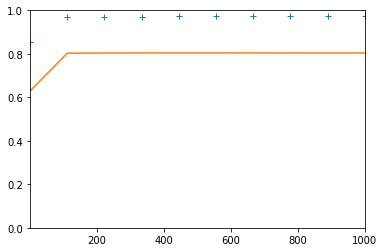

In [98]:
# Random Forest Regressor
R2_score_train=[]
R2_score_test=[]
import time
start = time.process_time()
n=np.linspace(1,1000,10,dtype=int)
for i in n:
  from sklearn.ensemble import RandomForestRegressor as RFR

  rfr = RFR(random_state=100,n_estimators=i).fit(x_train_preprocessed,y_train)
  R2_score_train.append(r2_score(rfr.predict(x_train_preprocessed),y_train))
  R2_score_test.append(r2_score(rfr.predict(x_test_preprocessed),y_test))
  print(time.process_time() - start)

plt.plot(n,R2_score_train,'+')
plt.plot(n,R2_score_test,'-')
plt.xlim(1,1000)
plt.ylim(0,1)

In [102]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
train_set,test_set,val_set= housing_pd_final[:18000],housing_pd_final[18000:19217],housing_pd_final[19217:]
len(train_set),len(test_set),len(val_set)
x_train,y_train = train_set.to_numpy()[:,:-1],train_set.to_numpy()[:,-1]
print('x_train = ' ,str(x_train.shape), ' y_train = ',str(y_train.shape))
x_val,y_val= val_set.to_numpy()[:,:-1],val_set.to_numpy()[:,-1]
print('x_Val = ' ,str(x_val.shape), ' y_val = ',str(y_val.shape))
x_test,y_test= test_set.to_numpy()[:,:-1],test_set.to_numpy()[:,-1]
print('x_test = ' ,str(x_test.shape), ' y_test = ',str(y_test.shape))


x_train =  (18000, 13)  y_train =  (18000,)
x_Val =  (1216, 13)  y_val =  (1216,)
x_test =  (1217, 13)  y_test =  (1217,)


In [117]:
# Standardize data 
# it is need 
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler().fit(x_train[:,:8]) # fit the value as normal distruibution

def preprocessor(X):
    A = np.copy(X)
    A[:,:8] = scaler.transform(A[:,:8])
    return A

x_train_preprocessed = preprocessor(x_train)
x_test_preprocessed = preprocessor(x_test)
x_val_preprocessed = preprocessor(x_val)



In [ ]:
from sklearn.metrics import mean_squared_error as mse

Epoch 1/100
563/563 [==============================] - 5s 8ms/step - loss: 28.5804 - mean_absolute_percentage_error: 28.5804 - val_loss: 22.9680 - val_mean_absolute_percentage_error: 22.9680
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 25.6064 - mean_absolute_percentage_error: 25.6064 - val_loss: 28.7432 - val_mean_absolute_percentage_error: 28.7432
Epoch 3/100
563/563 [==============================] - 3s 6ms/step - loss: 24.2847 - mean_absolute_percentage_error: 24.2847 - val_loss: 22.5695 - val_mean_absolute_percentage_error: 22.5695
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 23.7717 - mean_absolute_percentage_error: 23.7717 - val_loss: 23.4358 - val_mean_absolute_percentage_error: 23.4358
Epoch 5/100
563/563 [==============================] - 3s 6ms/step - loss: 23.3010 - mean_absolute_percentage_error: 23.3010 - val_loss: 21.2988 - val_mean_absolute_percentage_error: 21.2988
Epoch 6/100
563/563 [========================

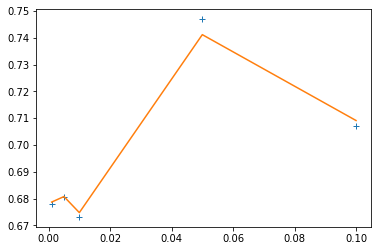

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import*
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanAbsolutePercentageError as MAPE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsolutePercentageError 
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(13,'relu'))
medium_nn.add(Dense(1,'linear'))
R2_score_train=[]
R2_score_test=[]
import time
start = time.process_time()

epoch=[0.1,0.05,0.01,0.005,0.001]
for i in epoch:
    opt = Adam(learning_rate=i) # deafult learning rate 0.001
    cp = ModelCheckpoint('model/medium_nn', save_best_only=True,verbose=0)
    medium_nn.compile(optimizer = opt,loss='MAPE',metrics=[MeanAbsolutePercentageError()])
    medium_nn.fit(x=x_train_preprocessed,y=y_train,validation_data =(x_val_preprocessed,y_val),callbacks=[cp] , epochs=100)
    R2_score_train.append(r2_score(medium_nn.predict(x_train_preprocessed),y_train))
    R2_score_test.append(r2_score(medium_nn.predict(x_test_preprocessed),y_test))
    print(time.process_time() - start)
plt.plot(epoch,R2_score_train,'+')
plt.plot(epoch,R2_score_test,'-')


Best r2score is get in the  Gradient Boosting Regressor with minimal overfitting
